<a href="https://colab.research.google.com/github/vihaanm12345/Medical-Dataset-image-classification/blob/main/VM_Model_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Datasets

## Balls

In [ ]:
import kagglehub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

# Download dataset
path = kagglehub.dataset_download("samuelcortinhas/sports-balls-multiclass-image-classification")
# path = kagglehub.dataset_download("phucthaiv02/butterfly-image-classification")
print("Path to dataset files:", path)

# Load dataset (assuming it’s organized into subfolders by cancer type)
img_size = (180, 180)
batch_size = 32
seed = 123

orig_train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(path, "train"),  # folder with subfolders per class
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,  # split into train/validation
    subset="training",                # this dataset is for training
    seed = seed
)

orig_val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(path, "train"),  # same folder, split will create validation set
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",            # this dataset is for validation
    shuffle=False,
    seed = seed
)

class_names = orig_train_ds.class_names
print("Classes:", class_names)

# Normalize images
normalization_layer = layers.Rescaling(1./255)
train_ds = orig_train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = orig_val_ds.map(lambda x, y: (normalization_layer(x), y))


KeyboardInterrupt: 

In [ ]:
print (val_ds.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


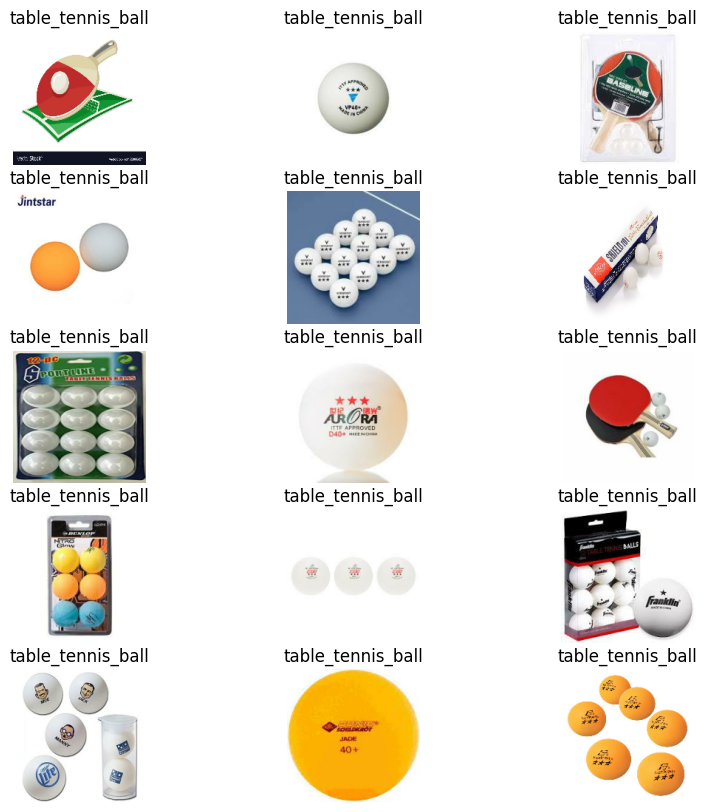

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of validation images and labels
for images, labels in val_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(15):
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

## Cancer

In [ ]:
import kagglehub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

# Download dataset
path = kagglehub.dataset_download("ramachandraudupa/multicancer-dataset")
print("Path to dataset files:", path)

# Load dataset (assuming it’s organized into subfolders by cancer type)
img_size = (180, 180)
batch_size = 32

orig_train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(path, "Cancer_Dataset", "train"),  # adjust folder if different
    image_size=img_size,
    batch_size=batch_size
)

orig_val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(path, "Cancer_Dataset", "val"),  # adjust folder if different
    image_size=img_size,
    batch_size=batch_size
)

class_names = orig_train_ds.class_names
print("Classes:", class_names)

# Normalize images
normalization_layer = layers.Rescaling(1./255)
train_ds = orig_train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = orig_val_ds.map(lambda x, y: (normalization_layer(x), y))

100%|██████████| 13.3G/13.3G [02:24<00:00, 98.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ramachandraudupa/multicancer-dataset/versions/1
Found 161961 files belonging to 47 classes.
Found 36803 files belonging to 47 classes.
Classes: ['Skin_Acne', 'Skin_Actinic Keratosis', 'Skin_Basal Cell Carcinoma', 'Skin_Chickenpox', 'Skin_Dermato Fibroma', 'Skin_Dyshidrotic Eczema', 'Skin_Melanoma', 'Skin_Nail Fungus', 'Skin_Nevus', 'Skin_Normal Skin', 'Skin_Pigmented Benign Keratosis', 'Skin_Ringworm', 'Skin_Seborrheic Keratosis', 'Skin_Squamous Cell Carcinoma', 'Skin_Vascular Lesion', 'all_benign', 'all_early', 'all_pre', 'all_pro', 'brain_glioma_tumor', 'brain_meningioma_tumor', 'brain_normal', 'brain_pituitary_tumor', 'breast_benign', 'breast_malignant', 'cervix_dyk', 'cervix_koc', 'cervix_mep', 'cervix_pab', 'cervix_sfi', 'colon_aca', 'colon_bnt', 'kidney_cyst', 'kidney_normal', 'kidney_stone', 'kidney_tumor', 'lung_colon_aca', 'lung_colon_n', 'lung_lung_aca', 'lung_lung_scc', 'lymph_cll', 'lymph_fl', 'lymph_mcl', 'oral_normal'

# Original Model

##Balls

Epoch 1/12


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.1060 - loss: 2.8275 - val_accuracy: 0.1816 - val_loss: 2.6622
Epoch 2/12
184/184 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.2481 - loss: 2.3402 - val_accuracy: 0.3522 - val_loss: 2.0251
Epoch 3/12
184/184 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.3740 - loss: 2.0107 - val_accuracy: 0.4669 - val_loss: 1.7136
Epoch 4/12
184/184 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.5242 - loss: 1.5412 - val_accuracy: 0.6157 - val_loss: 1.3424
Epoch 5/12
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.6797 - loss: 1.0598 - val_accuracy: 0.6382 - val_loss: 1.3097
Epoch 6/12
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.8100 - loss: 0.6098 - val_accuracy: 0.8150 - val_loss: 0.8273
Epoch 7/12
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.8875 - loss: 0.3832 - val_accuracy: 0.7604 - val_loss: 1.1101
Epoch 8/12
184/184 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.9227 - loss: 0.2866 - val_accura

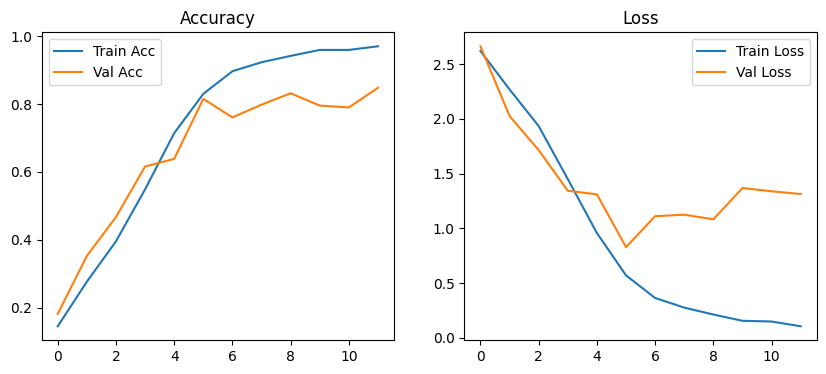

In [ ]:
# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train
history = model.fit(train_ds, validation_data=val_ds, epochs=12)

# model.save()

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 263ms/step


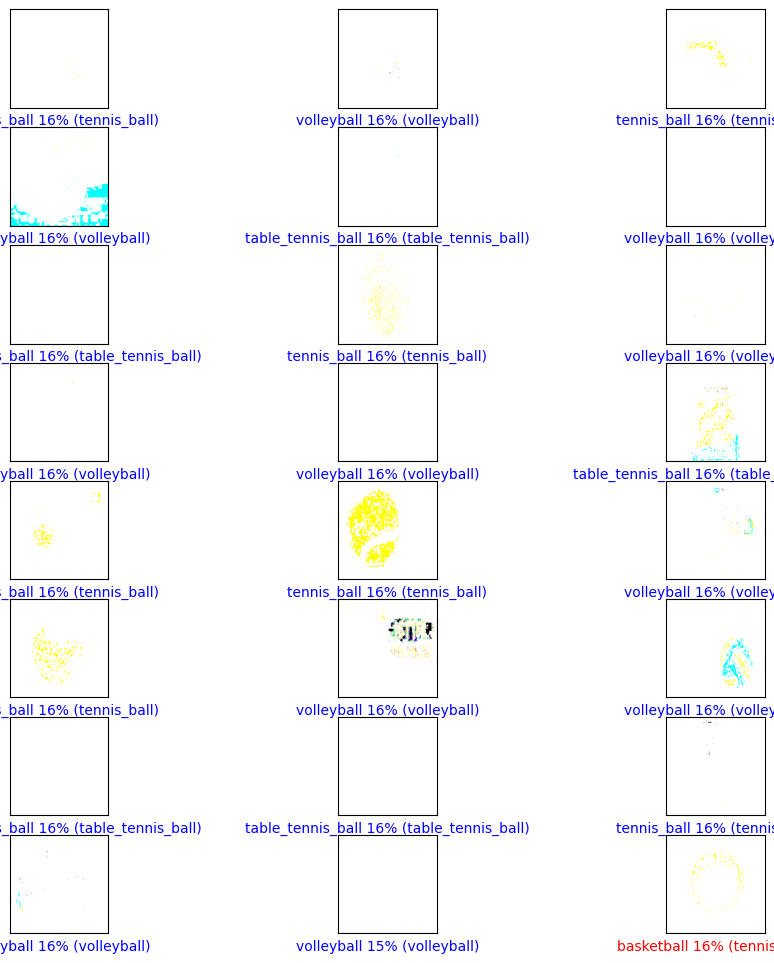

In [ ]:
import numpy as np
import random

val_labels = np.concatenate([y.numpy() for x, y in orig_val_ds], axis=0)
val_images = np.concatenate([x.numpy() for x, y in orig_val_ds], axis=0)

probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(val_images)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(len(class_names)), class_names, rotation=45, ha="right")
  plt.yticks([])
  thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

plt.figure(figsize=(12,12))
for i in range(24):
  #print(class_names[val_labels[i]])

  plt.subplot(8,3,i+1)
  j = random.randint(0, len(val_images) - 1)

  plot_image(j, predictions[j], val_labels, val_images)
  #plt.show()

  #plt.figure(figsize=(6,3))
  #plot_value_array(i, predictions[i],  val_labels)
plt.show()


## Cancer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 572s 112ms/step - accuracy: 0.5489 - loss: 1.2787 - val_accuracy: 0.8138 - val_loss: 0.4331
Epoch 2/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 579s 104ms/step - accuracy: 0.7844 - loss: 0.5319 - val_accuracy: 0.8442 - val_loss: 0.3665
Epoch 3/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 577s 114ms/step - accuracy: 0.8356 - loss: 0.3990 - val_accuracy: 0.8493 - val_loss: 0.3868
Epoch 4/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 532s 105ms/step - accuracy: 0.8654 - loss: 0.3313 - val_accuracy: 0.8592 - val_loss: 0.3820
Epoch 5/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 571s 107ms/step - accuracy: 0.8855 - loss: 0.2812 - val_accuracy: 0.8692 - val_loss: 0.3865
Epoch 6/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 545s 108ms/step - accuracy: 0.9053 - loss: 0.2387 - val_accuracy: 0.8760 - val_loss: 0.3876
Epoch 7/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 548s 108ms/step - accuracy: 0.9202 - loss: 0.2047 - val_accuracy: 0.8595 - val_loss: 0.5557
Epoch 8/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 593s 117ms/step - ac

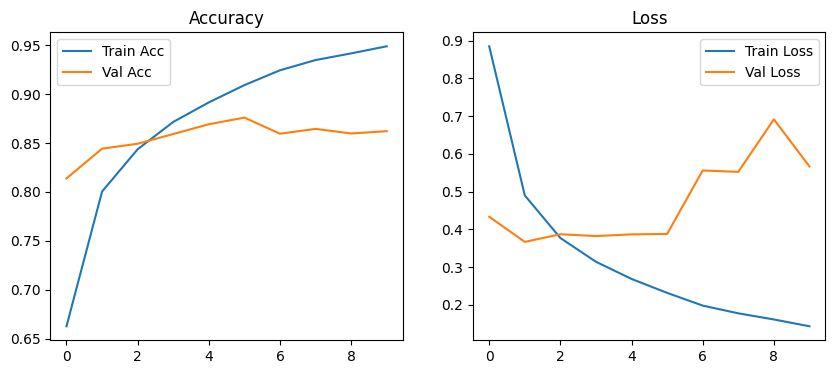

In [ ]:
# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# model.save()

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

More Layers

In [ ]:
# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),

    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# model.save()

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 541s 105ms/step - accuracy: 0.5421 - loss: 1.2884 - val_accuracy: 0.8204 - val_loss: 0.4245
Epoch 2/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 507s 100ms/step - accuracy: 0.7853 - loss: 0.5239 - val_accuracy: 0.8548 - val_loss: 0.3212
Epoch 3/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 562s 111ms/step - accuracy: 0.8366 - loss: 0.3899 - val_accuracy: 0.8559 - val_loss: 0.3425
Epoch 4/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 519s 103ms/step - accuracy: 0.8593 - loss: 0.3283 - val_accuracy: 0.8160 - val_loss: 0.5017
Epoch 5/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 579s 114ms/step - accuracy: 0.8780 - loss: 0.2839 - val_accuracy: 0.8744 - val_loss: 0.3157
Epoch 6/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 580s 114ms/step - accuracy: 0.8951 - loss: 0.2510 - val_accuracy: 0.8701 - val_loss: 0.3601
Epoch 7/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 580s 115ms/step - accuracy: 0.9101 - loss: 0.2238 - val_accuracy: 0.8740 - val_loss: 0.4217
Epoch 8/10
4467/5062 ━━━━━━━━━━━━━━━━━━━━ 51s 87ms/step - accu

In [ ]:
# Train
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# model.save()

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

NameError: name 'model' is not defined

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 580s 113ms/step - accuracy: 0.5454 - loss: 1.2736 - val_accuracy: 0.8124 - val_loss: 0.4204
Epoch 2/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 577s 114ms/step - accuracy: 0.7956 - loss: 0.4993 - val_accuracy: 0.8544 - val_loss: 0.3221
Epoch 3/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 574s 113ms/step - accuracy: 0.8399 - loss: 0.3801 - val_accuracy: 0.8573 - val_loss: 0.3363
Epoch 4/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 570s 113ms/step - accuracy: 0.8657 - loss: 0.3140 - val_accuracy: 0.8765 - val_loss: 0.3020
Epoch 5/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 581s 115ms/step - accuracy: 0.8863 - loss: 0.2685 - val_accuracy: 0.8682 - val_loss: 0.3345
Epoch 6/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 634s 125ms/step - accuracy: 0.8972 - loss: 0.2440 - val_accuracy: 0.8823 - val_loss: 0.3152
Epoch 7/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 572s 113ms/step - accuracy: 0.9086 - loss: 0.2231 - val_accuracy: 0.8877 - val_loss: 0.3183
Epoch 8/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 622s 113ms/step - ac

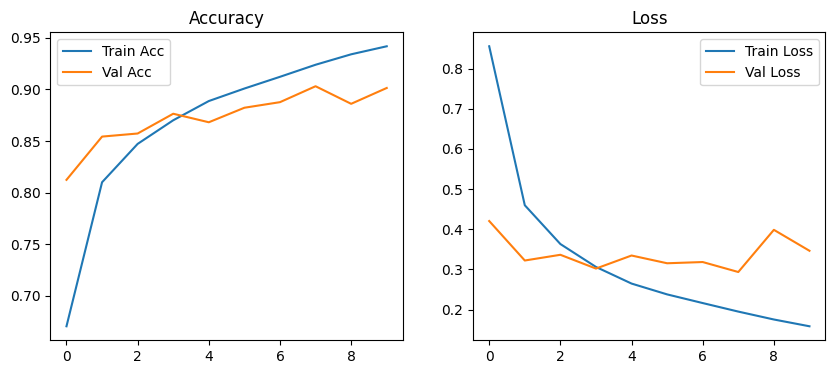

In [ ]:
# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),

    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# model.save()

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

# Using PreTrained Models to Boost Accuracy

Keras has many available models that are listed at https://keras.io/api/applications/. Most can be used as is.

Some basic principles are highlighted in the keras documentation about transfer learning: https://keras.io/guides/transfer_learning/.

The key principle is to import "imagenet" parameters without the top model and then set the base model to be non-trainable.

The base model is then used instead of the convolution layers in the simpler original model.


## **ResNet50V2**

In [ ]:
from tensorflow.keras.applications import ResNet50V2

# Load the ResNet50V2 model without the top classification layer
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze the layers of the base model
base_model.trainable = False

print("ResNet50V2 base model loaded and layers frozen.")

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
ResNet50V2 base model loaded and layers frozen.


In [ ]:
print(base_model.summary())

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 186, 186,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 90, 90,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 92, 92,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 45, 45,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 45, 45,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 45, 45,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 45, 45,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 45, 45,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 45, 45,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 47, 47,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 45, 45,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 45, 45,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 45, 45,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 45, 45,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 45, 45,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 45, 45,    │          0 │ conv2_block1_0_c

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

None


**Reasoning**:
Now that the base model is loaded and its layers are frozen, I need to add new classification layers on top of it. This includes a Flatten layer, a Dense layer with ReLU activation, and a final Dense layer with softmax activation corresponding to the number of classes. After defining the architecture, the model must be compiled with an appropriate optimizer, loss function, and metrics.



In [ ]:
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

print("New model with ResNet50V2 base and classification head created and compiled.")

New model with ResNet50V2 base and classification head created and compiled.


**Reasoning**:
With the new model architecture defined and compiled, the next step is to train it for 10 epochs using the provided training and validation datasets, and then visualize the training history (accuracy and loss).



In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 6, 6, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     9,437,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,008,175 (125.92 MB)

 Trainable params: 9,443,375 (36.02 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

None


### Balls

Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - accuracy: 0.4366 - loss: 4.7141 - val_accuracy: 0.6498 - val_loss: 1.0242
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - accuracy: 0.7281 - loss: 0.9077 - val_accuracy: 0.7625 - val_loss: 0.7519
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.8184 - loss: 0.6017 - val_accuracy: 0.8423 - val_loss: 0.5302
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.8730 - loss: 0.3947 - val_accuracy: 0.8505 - val_loss: 0.5529
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.9099 - loss: 0.2940 - val_accuracy: 0.8853 - val_loss: 0.4959
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9205 - loss: 0.2619 - val_accuracy: 0.8976 - val_loss: 0.4212
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9406 - loss: 0.1962 - val_accuracy: 0.9003 - val_loss: 0.4696
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - accuracy: 0.9473 - loss: 0.1565 -

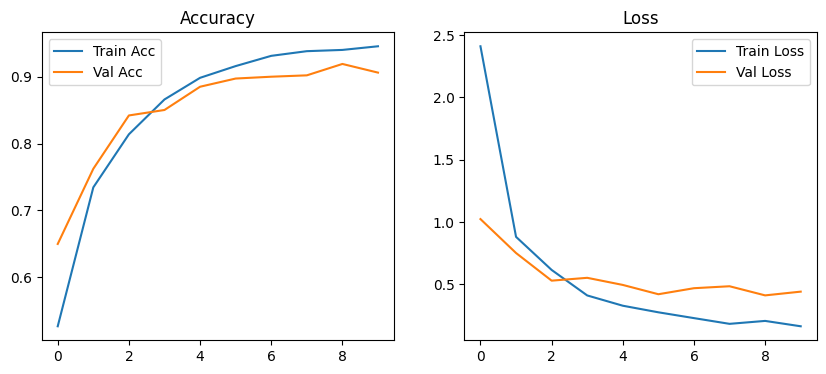

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

### Cancer

Epoch 1/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 615s 119ms/step - accuracy: 0.6658 - loss: 1.0332 - val_accuracy: 0.8244 - val_loss: 0.4569
Epoch 2/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 528s 104ms/step - accuracy: 0.8154 - loss: 0.4518 - val_accuracy: 0.8514 - val_loss: 0.4235
Epoch 3/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 526s 104ms/step - accuracy: 0.8550 - loss: 0.3580 - val_accuracy: 0.8413 - val_loss: 0.5225
Epoch 4/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 524s 104ms/step - accuracy: 0.8742 - loss: 0.3025 - val_accuracy: 0.8625 - val_loss: 0.5689
Epoch 5/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 530s 105ms/step - accuracy: 0.8892 - loss: 0.2619 - val_accuracy: 0.8522 - val_loss: 0.6768
Epoch 6/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 524s 104ms/step - accuracy: 0.9021 - loss: 0.2377 - val_accuracy: 0.8694 - val_loss: 0.5783
Epoch 7/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 569s 105ms/step - accuracy: 0.9080 - loss: 0.2248 - val_accuracy: 0.8669 - val_loss: 0.6843
Epoch 8/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 530s 105ms/step - ac

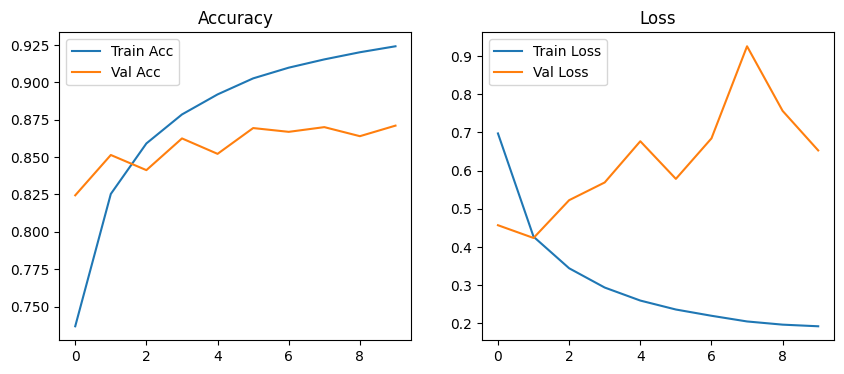

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

## Xception

In [ ]:
from tensorflow.keras.applications import Xception

# Load the ResNet50V2 model without the top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze the layers of the base model
base_model.trainable = False

print("Xception base model loaded and layers frozen.")
print(base_model.summary())

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Xception base model loaded and layers frozen.


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 89, 89,    │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 89, 89,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 89, 89,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 87, 87,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 87, 87,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 87, 87,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 87, 87,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 87, 87,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 87, 87,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 87, 87,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 87, 87,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 44, 44,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 44, 44,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 44, 44,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 44, 44,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 44, 44,    │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

None


In [ ]:
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

print("New model with Xception base and classification head created and compiled.")
print(model.summary())

New model with Xception base and classification head created and compiled.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 6, 6, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     9,437,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,304,855 (115.60 MB)

 Trainable params: 9,443,375 (36.02 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

None


### Balls

Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 68s 259ms/step - accuracy: 0.5179 - loss: 3.6594 - val_accuracy: 0.7747 - val_loss: 0.8137
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 19s 105ms/step - accuracy: 0.7947 - loss: 0.7138 - val_accuracy: 0.8765 - val_loss: 0.4475
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.8474 - loss: 0.4919 - val_accuracy: 0.8628 - val_loss: 0.4633
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.8989 - loss: 0.3197 - val_accuracy: 0.8846 - val_loss: 0.4115
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9300 - loss: 0.2131 - val_accuracy: 0.9208 - val_loss: 0.3004
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.9475 - loss: 0.1516 - val_accuracy: 0.9263 - val_loss: 0.3235
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.9623 - loss: 0.1161 - val_accuracy: 0.9563 - val_loss: 0.2101
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.9606 - loss: 0

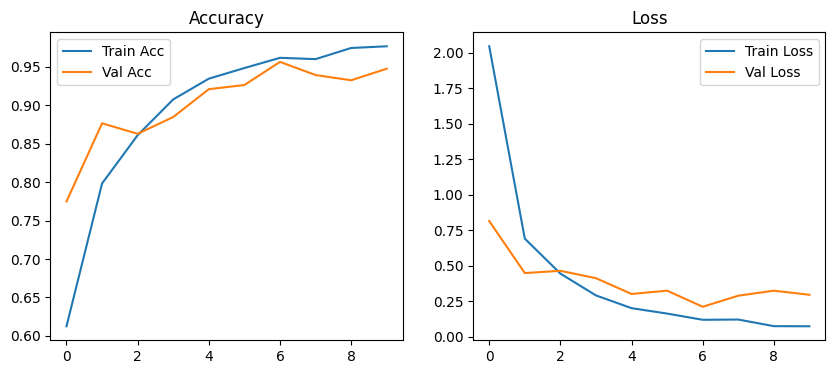

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

### Cancer

Epoch 1/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 642s 123ms/step - accuracy: 0.6567 - loss: 1.0473 - val_accuracy: 0.7813 - val_loss: 0.4897
Epoch 2/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 543s 107ms/step - accuracy: 0.7800 - loss: 0.5193 - val_accuracy: 0.8072 - val_loss: 0.4447
Epoch 3/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 546s 108ms/step - accuracy: 0.8103 - loss: 0.4481 - val_accuracy: 0.8069 - val_loss: 0.4560
Epoch 4/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 544s 107ms/step - accuracy: 0.8312 - loss: 0.3967 - val_accuracy: 0.8172 - val_loss: 0.4450
Epoch 5/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 545s 108ms/step - accuracy: 0.8455 - loss: 0.3636 - val_accuracy: 0.8228 - val_loss: 0.4483
Epoch 6/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 553s 109ms/step - accuracy: 0.8553 - loss: 0.3376 - val_accuracy: 0.8172 - val_loss: 0.4979
Epoch 7/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 556s 110ms/step - accuracy: 0.8624 - loss: 0.3209 - val_accuracy: 0.8238 - val_loss: 0.5327
Epoch 8/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 594s 117ms/step - ac

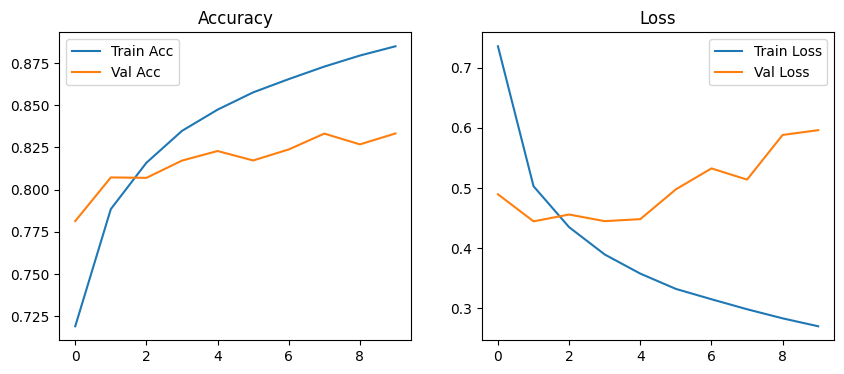

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

## InceptionResNetV2

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

# Load the InceptionResNetV2 model without the top classification layer
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze the layers of the base model
base_model.trainable = False

print("InceptionResNetV2 base model loaded and layers frozen.")
print(base_model.summary())

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
InceptionResNetV2 base model loaded and layers frozen.


Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 89, 89,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 89, 89,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 89, 89,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 87, 87,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 87, 87,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 87, 87,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 87, 87,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 87, 87,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 87, 87,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 43, 43,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 43, 43,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 43, 43,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 43, 43,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 41, 41,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 41, 41,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 41, 41,    │          0 │ batch_normalizat

 Total params: 54,336,736 (207.28 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 54,336,736 (207.28 MB)

None


In [ ]:
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

print("New model with InceptionResNetV2 base and classification head created and compiled.")
print(model.summary())

New model with InceptionResNetV2 base and classification head created and compiled.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_resnet_v2             │ (None, 4, 4, 1536)     │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 24576)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,145,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,488,655 (219.30 MB)

 Trainable params: 3,151,919 (12.02 MB)

 Non-trainable params: 54,336,736 (207.28 MB)

None


### Balls

Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 84s 299ms/step - accuracy: 0.4984 - loss: 4.7842 - val_accuracy: 0.6928 - val_loss: 1.1426
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 25s 134ms/step - accuracy: 0.7578 - loss: 0.8499 - val_accuracy: 0.7720 - val_loss: 0.8325
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 24s 132ms/step - accuracy: 0.8017 - loss: 0.6643 - val_accuracy: 0.8007 - val_loss: 0.6654
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 41s 133ms/step - accuracy: 0.8482 - loss: 0.4742 - val_accuracy: 0.7863 - val_loss: 0.8004
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 41s 133ms/step - accuracy: 0.8784 - loss: 0.3890 - val_accuracy: 0.8812 - val_loss: 0.3897
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 24s 131ms/step - accuracy: 0.9001 - loss: 0.3106 - val_accuracy: 0.8949 - val_loss: 0.3604
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 24s 130ms/step - accuracy: 0.9257 - loss: 0.2227 - val_accuracy: 0.9365 - val_loss: 0.2478
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 24s 131ms/step - accuracy: 0.9369 - loss: 0

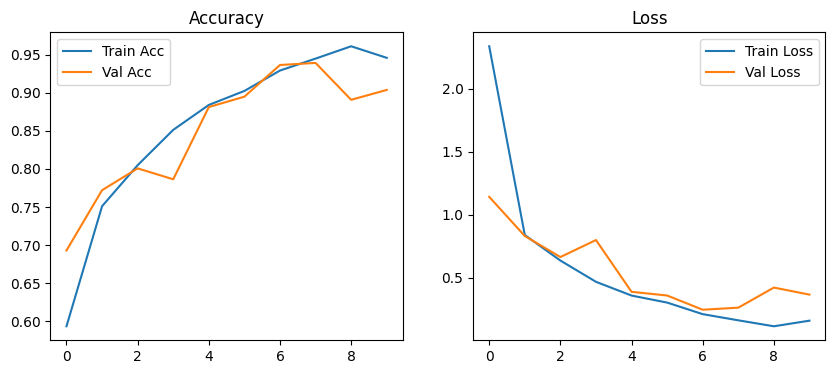

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

### Cancer

Epoch 1/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 739s 140ms/step - accuracy: 0.5075 - loss: 1.5134 - val_accuracy: 0.7324 - val_loss: 0.6288
Epoch 2/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 657s 130ms/step - accuracy: 0.7276 - loss: 0.6573 - val_accuracy: 0.7708 - val_loss: 0.5679
Epoch 3/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 682s 130ms/step - accuracy: 0.7618 - loss: 0.5664 - val_accuracy: 0.7710 - val_loss: 0.5901
Epoch 4/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 656s 130ms/step - accuracy: 0.7808 - loss: 0.5179 - val_accuracy: 0.7912 - val_loss: 0.5374
Epoch 5/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 660s 130ms/step - accuracy: 0.7967 - loss: 0.4802 - val_accuracy: 0.7888 - val_loss: 0.5564
Epoch 6/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 664s 131ms/step - accuracy: 0.8064 - loss: 0.4491 - val_accuracy: 0.7953 - val_loss: 0.5699
Epoch 7/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 665s 131ms/step - accuracy: 0.8124 - loss: 0.4371 - val_accuracy: 0.7791 - val_loss: 0.6230
Epoch 8/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 662s 131ms/step - ac

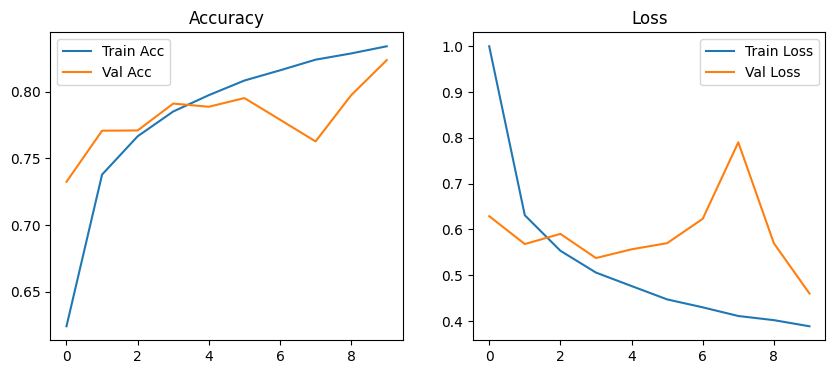

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

## EfficientNetB3

Base model requires un-normalized inputs, i.e.,  (0-255) range. Using normalized inputs leads to 0 accuracy.

In [ ]:
from tensorflow.keras.applications import EfficientNetB3

# Load the EfficientNetB3 model without the top classification layer
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze the layers of the base model
base_model.trainable = False

print("EfficientNetB3 base model loaded and layers frozen.")
print(base_model.summary())

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
EfficientNetB3 base model loaded and layers frozen.


Model: "efficientnetb3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 180, 180,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 180, 180,  │          7 │ rescaling_1[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 180, 180,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 181, 181,  │          0 │ rescaling_2[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 90, 90,    │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 90, 90,    │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 90, 90,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 90, 90,    │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 90, 90,    │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 90, 90,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 90, 90,    │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 90, 90,    │        960 │ block1a_se_excit

 Total params: 10,783,535 (41.14 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 10,783,535 (41.14 MB)

None


In [ ]:
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

print("New model with EfficientNetB3 base and classification head created and compiled.")
print(model.summary())

New model with EfficientNetB3 base and classification head created and compiled.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)     │ (None, 6, 6, 1536)     │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 55296)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,078,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,867,614 (68.16 MB)

 Trainable params: 7,084,079 (27.02 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

None


### Balls

Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 94s 318ms/step - accuracy: 0.5693 - loss: 2.3397 - val_accuracy: 0.8642 - val_loss: 0.4395
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.8799 - loss: 0.4079 - val_accuracy: 0.9379 - val_loss: 0.2436
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.9318 - loss: 0.2248 - val_accuracy: 0.9522 - val_loss: 0.1894
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.9487 - loss: 0.1599 - val_accuracy: 0.9652 - val_loss: 0.1794
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.9721 - loss: 0.1021 - val_accuracy: 0.9700 - val_loss: 0.1624
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9764 - loss: 0.0746 - val_accuracy: 0.9638 - val_loss: 0.1795
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9773 - loss: 0.0647 - val_accuracy: 0.9556 - val_loss: 0.2254
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.9776 - loss: 0.061

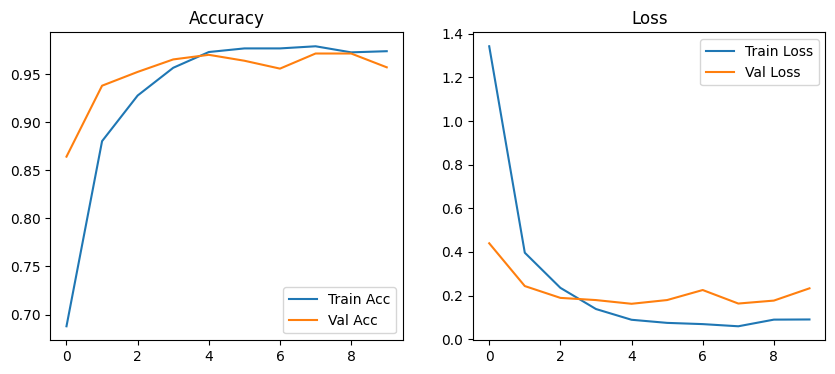

In [ ]:
print(model.summary())

history = model.fit(orig_train_ds, validation_data=orig_val_ds, epochs=10)

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

### Cancer

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)     │ (None, 6, 6, 1536)     │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 55296)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,078,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,867,614 (68.16 MB)

 Trainable params: 7,084,079 (27.02 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

None
Epoch 1/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 666s 123ms/step - accuracy: 0.6947 - loss: 0.8966 - val_accuracy: 0.8319 - val_loss: 0.4293
Epoch 2/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 534s 105ms/step - accuracy: 0.8158 - loss: 0.4654 - val_accuracy: 0.8587 - val_loss: 0.3606
Epoch 3/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 532s 105ms/step - accuracy: 0.8447 - loss: 0.3930 - val_accuracy: 0.8754 - val_loss: 0.3355
Epoch 4/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 533s 105ms/step - accuracy: 0.8591 - loss: 0.3627 - val_accuracy: 0.8751 - val_loss: 0.3393
Epoch 5/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 563s 105ms/step - accuracy: 0.8705 - loss: 0.3364 - val_accuracy: 0.8792 - val_loss: 0.3375
Epoch 6/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 574s 108ms/step - accuracy: 0.8770 - loss: 0.3129 - val_accuracy: 0.8864 - val_loss: 0.3504
Epoch 7/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 547s 108ms/step - accuracy: 0.8856 - loss: 0.2963 - val_accuracy: 0.8898 - val_loss: 0.3426
Epoch 8/10
5062/5062 ━━━━━━━━━━━━━━━━━━━━ 546s 108ms/step

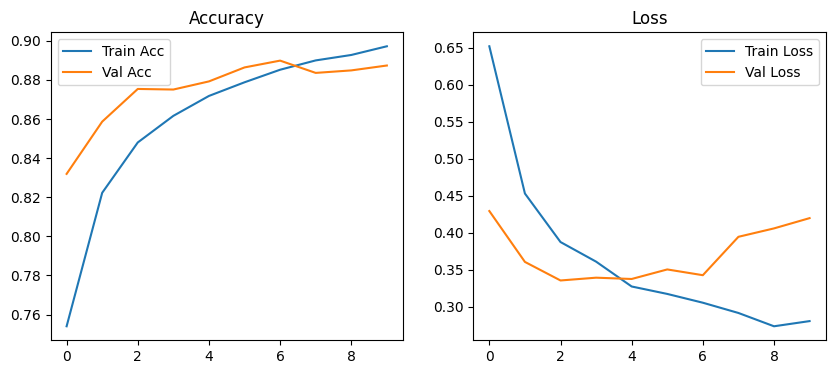

In [ ]:
print(model.summary())

history = model.fit(orig_train_ds, validation_data=orig_val_ds, epochs=10)

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

#Kaggle example model medicine

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(len(class_names),, activation='softmax')
])

In [ ]:
history = model.fit(orig_train_ds, validation_data=orig_val_ds, epochs=10)

# Plot accuracy & loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()